In [488]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import KFold,LeaveOneOut,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE,RFECV
from mlxtend.feature_selection import SequentialFeatureSelector
    
from statsmodels.stats.diagnostic import linear_rainbow

import warnings
warnings.filterwarnings('ignore')

In [489]:
mpg=sns.load_dataset('mpg')

In [490]:
# Objective : Train a LR model which could predict the milage of the car on the basis following information
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [491]:
# LR model interpretations when IV is categorical(mpg-origin)

In [492]:
mpg['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [493]:
mpg.groupby(by=['origin'])['mpg'].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [494]:
origin=pd.get_dummies(mpg['origin'],dtype=int,drop_first=True)

In [495]:
origin=sma.add_constant(origin)

In [496]:
origin

,const,japan,usa
0,1.0,0,1
1,1.0,0,1
2,1.0,0,1
3,1.0,0,1
4,1.0,0,1
...,...,...,...
393,1.0,0,1
394,1.0,0,0
395,1.0,0,1
396,1.0,0,1


In [497]:
model=sma.OLS(mpg['mpg'],origin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.54
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           1.92e-35
Time:                        11:51:34   Log-Likelihood:                -1302.0
No. Observations:                 398   AIC:                             2610.
Df Residuals:                     395   BIC:                             2622.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.8914      0.765     36.461      0.000      26.388      29.395
japan          2.5592      1.051      2.436      0.015       0.494       4.625
usa           -7.8079      0.866     -9.018      0.000      -9.510      -6.106
==============================================================================
Omnibus:                       24.959   Durbin-Watson:                   0.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.429
Skew:                           0.655   Prob(JB):                     6.71e-07
Kurtosis:                       3.021   Cond. No.                         5.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [498]:
# mpg = 27.8914 + (2.5592)*japan - 7.8079*(usa)

# Europe 0,0
# Japan 1,0
# Usa 0,1

In [499]:
# Europe
27.8914 + (2.5592)*(0) - 7.8079*(0)

27.8914

In [500]:
# Japan
27.8914 + (2.5592)*(1) - 7.8079*(0)

30.4506

In [501]:
# Usa
27.8914 + (2.5592)*(0) - 7.8079*(1)

20.0835

In [502]:
# So basically it predicts the avg target in that category

In [503]:
# What if the category is not one hot or dummy encoded

In [504]:
mpg.groupby(by=['cylinders'])['mpg'].mean()

cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

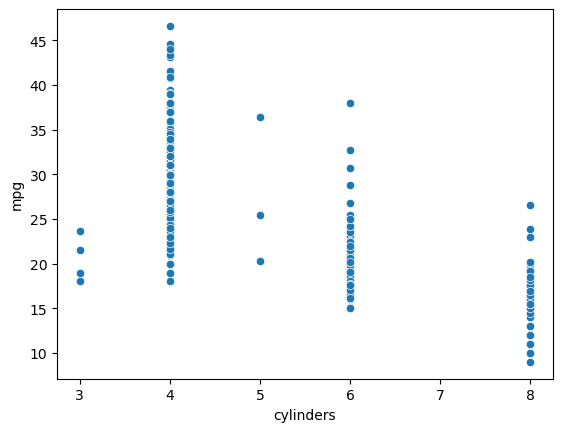

In [505]:
sns.scatterplot(x=mpg['cylinders'],y=mpg['mpg'])
plt.show()

In [506]:
cylinder=sma.add_constant(mpg['cylinders'])

In [507]:
model1=sma.OLS(mpg['mpg'],cylinder).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     597.1
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           4.50e-81
Time:                        11:51:34   Log-Likelihood:                -1199.6
No. Observations:                 398   AIC:                             2403.
Df Residuals:                     396   BIC:                             2411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9493      0.833     51.557      0.000      41.312      44.587
cylinders     -3.5629      0.146    -24.435      0.000      -3.850      -3.276
==============================================================================
Omnibus:                       39.142   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.841
Skew:                           0.704   Prob(JB):                     2.03e-12
Kurtosis:                       4.124   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [508]:
#mpg = 42.9493 - 3.5629* cylinder

In [509]:
print(42.9493 - 3.5629* 3)
print(42.9493 - 3.5629* 4)
print(42.9493 - 3.5629* 5)
print(42.9493 - 3.5629* 6)
print(42.9493 - 3.5629* 8)

32.2606
28.6977
25.134800000000002
21.5719
14.446100000000001


In [510]:
mpg.groupby(by=['cylinders'])['mpg'].mean()

cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

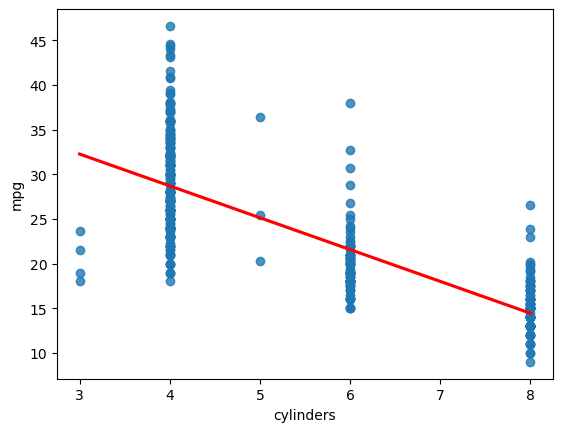

In [511]:
sns.regplot(x=mpg['cylinders'],y=mpg['mpg'],ci=0,line_kws={'color':'red'})
plt.show()

In [512]:
# here it regresses the model between the average of each category

### Lets make a LR Model on this data

In [513]:
mpg.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


<Axes: >

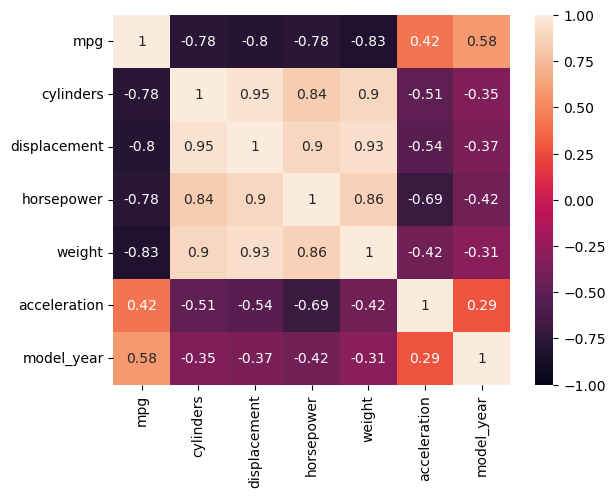

In [514]:
sns.heatmap(mpg.select_dtypes(include=np.number).corr(),vmax=1,vmin=-1,annot=True)

In [515]:
mpg.describe(include=object).T

,count,unique,top,freq
origin,398,3,usa,249
name,398,305,ford pinto,6


In [516]:
# Missing 
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [517]:
mpg[mpg['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [518]:
mpg['horsepower']=mpg['horsepower'].fillna(mpg['horsepower'].median())

In [519]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [520]:
# Dummy encoding ---> origin

In [521]:
mpg['name']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: object

In [522]:
mpg['brand']=mpg['name'].str.split(expand=True).iloc[:,0]

In [523]:
top_10=mpg['brand'].value_counts()[:10].index

In [524]:
top_10

Index(['ford', 'chevrolet', 'plymouth', 'amc', 'dodge', 'toyota', 'datsun',
       'buick', 'pontiac', 'volkswagen'],
      dtype='object', name='brand')

In [525]:
def brand(brand):
    if brand not in top_10:
        return('others')
    else:
        return brand

In [526]:
mpg['brand']=mpg['brand'].apply(brand)

In [527]:
map_dict=mpg['brand'].value_counts().to_dict()

In [528]:
mpg['brand']=mpg['brand'].map(map_dict)

In [529]:
del mpg['name']

In [530]:
# mpg=pd.get_dummies(mpg,drop_first=True,dtype=int)

In [531]:
mpg=pd.get_dummies(mpg,dtype=int)
del mpg['origin_usa']

In [532]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,brand,origin_europe,origin_japan
0,18.0,8,307.0,130.0,3504,12.0,70,43,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,17,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,31,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,28,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,51,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,51,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,121,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,28,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,51,0,0


In [533]:
# To remove multicolinearity lets
mpg['Engine para']=mpg['horsepower']+mpg['weight']+mpg['cylinders']+mpg['displacement']+mpg['acceleration']
mpg.drop(columns=['horsepower','weight','cylinders','acceleration','displacement'],inplace=True)

## Build a base model

In [534]:
x=mpg.drop(columns=['mpg'])
y=mpg['mpg']

In [535]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2)

In [536]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(318, 5) (318,) (80, 5) (80,)


In [537]:
# Assumption1: Target is number
# Assumption2: check multicolinerity

In [538]:
# Check for multicollinearity
vif_list=[]

for i in range(x_train.shape[1]):
    vif_list.append(variance_inflation_factor(x_train.values,i))
    
pd.DataFrame({"Feature Names":x_train.columns,'VIF':vif_list}).sort_values(by="VIF",ascending=False)

,Feature Names,VIF
0,model_year,21.790668
4,Engine para,16.109106
1,brand,4.081041
2,origin_europe,1.974735
3,origin_japan,1.797227


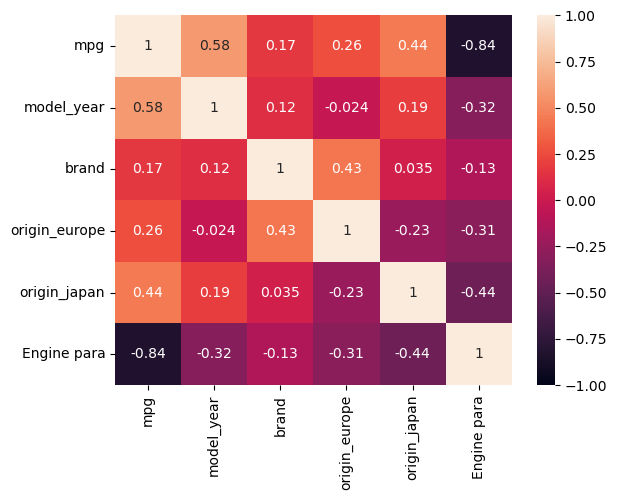

In [539]:
sns.heatmap(mpg.select_dtypes(include=np.number).corr(),vmax=1,vmin=-1,annot=True)
plt.show()

In [540]:
# fit a model
x_train_c=sma.add_constant(x_train)
x_test_c=sma.add_constant(x_test)

base_model=sma.OLS(y_train,x_train_c).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     252.2
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          2.67e-107
Time:                        11:51:35   Log-Likelihood:                -846.80
No. Observations:                 318   AIC:                             1706.
Df Residuals:                     312   BIC:                             1728.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -17.2696      4.707     -3.669      0.000     -26.530      -8.009
model_year        0.7559      0.057     13.225      0.000       0.643       0.868
brand            -0.0068      0.006     -1.212      0.227      -0.018       0.004
origin_europe     2.3723      0.692      3.430      0.001       1.012       3.733
origin_japan      1.7963      0.609      2.951      0.003       0.599       2.994
Engine para      -0.0052      0.000    -19.702      0.000      -0.006      -0.005
==============================================================================
Omnibus:                       28.525   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.686
Skew:                           0.579   Prob(JB):                     1.98e-10
Kurtosis:                       4.426   Cond. No.                     8.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [541]:
# Assumption: Linearity of model

In [542]:
# Ho: variables are linear
# Ha: variables are not linear

p_val=linear_rainbow(base_model)[1]
print('P_value:',p_val)

if p_val<0.05:
    print('Reject the null hypo')
else:
    print('Fail to reject the null hypo')

P_value: 0.5005318826630085
Fail to reject the null hypo


In [543]:
# Assumption auto correlation: met

In [544]:
# Assumption of Homoskedasiticty : not met


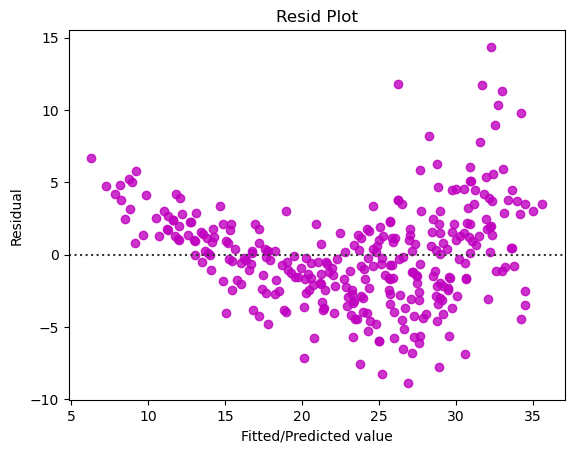

In [545]:
# Residual plot
sns.residplot(x=base_model.fittedvalues,y=base_model.resid,color='m')
plt.xlabel('Fitted/Predicted value')
plt.ylabel('Residual')
plt.title('Resid Plot')
plt.show()

In [546]:
# Breusch Pagan test

# Ho: The variance is same: Homoskedastic
# Ha: The variance is not same: Homoskedastic

p_value=sma.stats.diagnostic.het_breuschpagan(resid=base_model.resid,exog_het=base_model.model.exog)[1]

if p_value<0.05:
    print('Reject Ho')
else:
    print('Fail to reject Ho')

Reject Ho


In [547]:
# Assumption for normality: not met

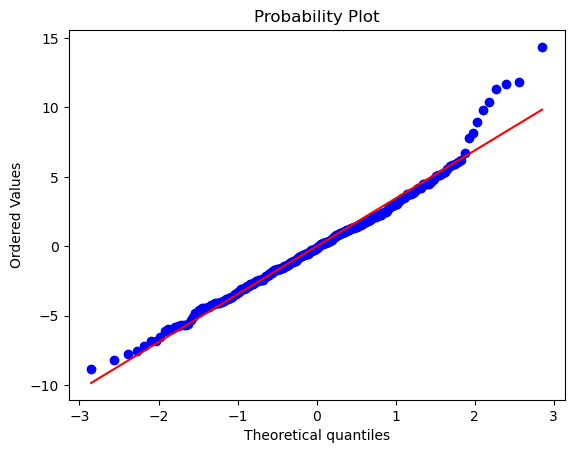

In [548]:
# QQ plot
stats.probplot(base_model.resid,plot=plt)
plt.show()

In [549]:
# Shapiro-Wilk Test   (Number of rows<5000)

# Ho: The data is normal
# Ha: The data is not normal

p_value=stats.shapiro(base_model.resid)[1]

print('p_value:',p_value)
if p_value<0.05:
    print('Reject Ho')
else:
    print('Fail to reject Ho')

p_value: 5.068346581538208e-05
Reject Ho


In [ ]:
# Summary
# Assumption 1: number target: met
# Assumption 2: Multicolinearity : not met (category)
# Assumption 3: Linearity:met
# Assumption 4: Autocorrelation: met
# Assumption 5: Homoskedastic: met
# Assumption 6: Normal residual: not met